# Preprocessing Steps

In [ ]:
import nibabel as nib #for neuroimaging data formats
import matplotlib.pyplot as plt
import numpy as np

The dataset being used here is of Brain
MRI from IXI Dataset
-
a brain mri provided by the IXI dataset: https://brain-development.org/ixi-dataset/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading data and EXtracting Volume

In [ ]:
brain_mri = nib.load("/content/drive/MyDrive/Independent Study/Data Formats/Preprocessing/IXI662-Guys-1120-T1.nii.gz")
#The file format .nii.gz indicates that it's a compressed NIfTI file
brain_mri_data = brain_mri.get_fdata() #Extracts the data from the loaded MRI file. get_fdata() function converts the data into a floating-point array for further processing.

In [ ]:
# Get the data type of the array
data_type = brain_mri_data.dtype
print("Data Type:", data_type)

Data Type: float64


In [ ]:
shape = brain_mri.shape  #shape of the brain_mri_data  3D array
affine = brain_mri.affine # 4X4 matrix
#1 to 3 elements handle rotation, scaling, shearing of image
# used for homogenous coordinates (tell how much you need to shift to align)
size = brain_mri_data.size #giving all the elements of the array (total numbe rof voxels)
print(affine)
print(shape)
print (size)

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(256, 256, 150)
9830400


In [ ]:
affine[:, 3:] #extracting 4th column

array([[ -90.67985535],
       [ 102.82944489],
       [-114.82378387],
       [   1.        ]])

Slicing through volume in all orientations like- axial, coronal, sagital

  For finding out the current orientation we use affine

In [ ]:
nib.aff2axcodes(affine)

('P', 'S', 'R')

Coronal View

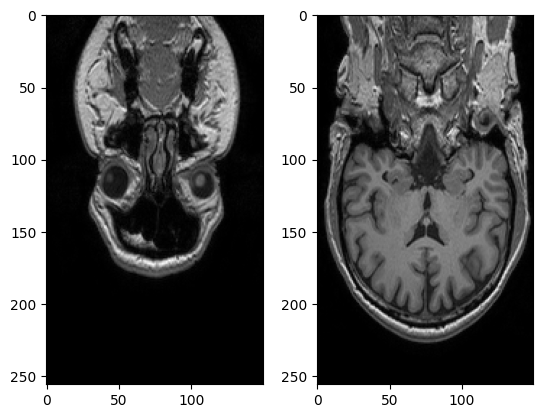

In [ ]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[40, :, :], cmap="gray")
axis[1].imshow(brain_mri_data[120, :, :], cmap="gray")

Axial View

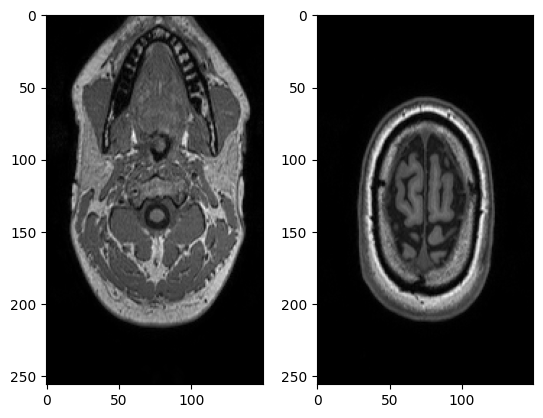

In [ ]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[:, 30, :], cmap="gray")
axis[1].imshow(brain_mri_data[:, 200, :], cmap="gray")

Sagittal View

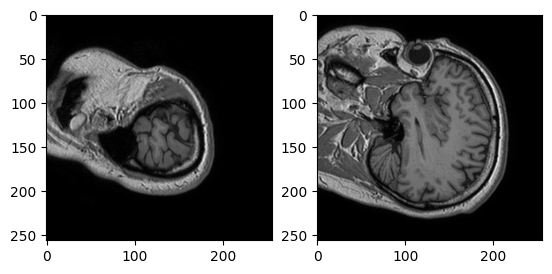

In [ ]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[:, :, 20], cmap="gray")
axis[1].imshow(brain_mri_data[:, :, 45], cmap="gray")

**Transforming the coordinates between coordinate systems**

if you want to calculate the physical coordinates of the offset, i.e where the voxel coordinates (0,0,0) lie in the physical space, you simply multiply the affine matrix with those coordinates.

Note that you append the 1 for convienience to work with the 4x4 matrix

In [ ]:
voxel_coord = np.array((0, 0, 0, 1))
physical_coord0 = affine @ voxel_coord  # @ is a shortcut for matrix multiplication in numpy
print(physical_coord0)

[ -90.67985535  102.82944489 -114.82378387    1.        ]


**Reorientation**

In [ ]:
brain_mri_canonical = nib.as_closest_canonical(brain_mri)
brain_mri_canonical_data = brain_mri_canonical.get_fdata()

In [ ]:
canonical_affine = brain_mri_canonical.affine
print(affine)
print("----")
print(canonical_affine)
print(nib.aff2axcodes(canonical_affine))

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
----
[[ 1.19975281e+00 -1.89821944e-02 -2.72075552e-03 -8.58393958e+01]
 [ 2.45456006e-02  9.27821696e-01  1.32986516e-01 -1.33765088e+02]
 [ 5.71511449e-11 -1.33014351e-01  9.28015888e-01 -8.09051243e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
('R', 'A', 'S')


The reorientation of medical imaging data, such as MRI scans, to a canonical orientation is an essential step in preprocessing. This process involves adjusting the orientation of the imaging data so that it aligns with a standard coordinate system, typically the "RAS" orientation. RAS stands for Right-Anterior-Superior, indicating that the x-axis points towards the right side of the patient, the y-axis points towards the front (anterior), and the z-axis points upwards (superior).

**Visualize slices from a brain MRI dataset **that has been reoriented to a canonical orientation. Each snippet involves displaying different slices of the MRI data in order to explore various sections through the brain.

*By slicing, we are extracting the 2d image froma specific positon within a 3d array*

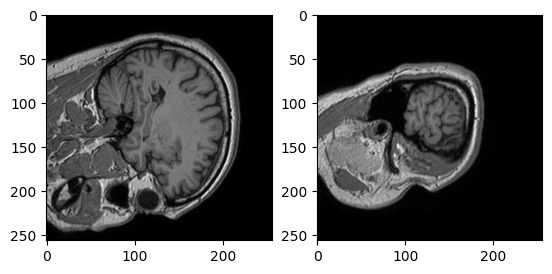

In [ ]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_canonical_data[50, :, :], cmap="gray")
axis[1].imshow(brain_mri_canonical_data[130, :, :], cmap="gray")


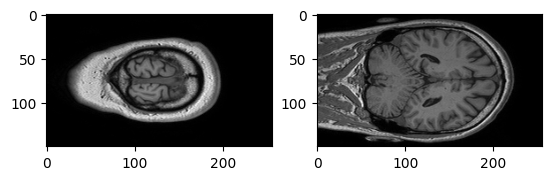

In [ ]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_canonical_data[:, 40, :], cmap="gray")
axis[1].imshow(brain_mri_canonical_data[:, 90, :], cmap="gray")

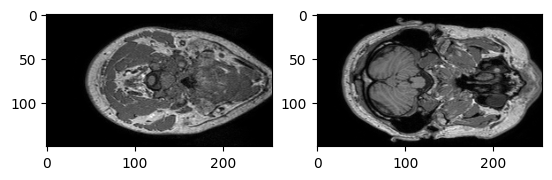

In [ ]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_canonical_data[:, :, 5], cmap="gray")
axis[1].imshow(brain_mri_canonical_data[:, :, 70], cmap="gray")

# Resampling

To change the size of your scan as it might be too large for the system.

Resizing an image is not that easy because the voxel size needs to be changed.

Let's resize our brain mri from (256, 256, 150) to (128, 128, 100)

In [ ]:
print(brain_mri.header.get_zooms())
#for accessing the size of a voxel in the volume. it returns the size in all directions in mm

(0.9375, 0.9375, 1.2000039)


In [ ]:
print(brain_mri.shape)
print(brain_mri.header.get_zooms())

(256, 256, 150)
(0.9375, 0.9375, 1.2000039)


In [ ]:
import nibabel.processing

In [ ]:
voxel_size = (2, 2, 2)
brain_mri_resized = nibabel.processing.conform(brain_mri, (128, 128, 100), voxel_size, orientation="PSR")
brain_mri_resized_data = brain_mri_resized.get_fdata()

In [ ]:
print(brain_mri.shape)
print(brain_mri_resized.shape)
print(brain_mri_resized.header.get_zooms())

(256, 256, 150)
(128, 128, 100)
(2.0, 2.0, 2.0)


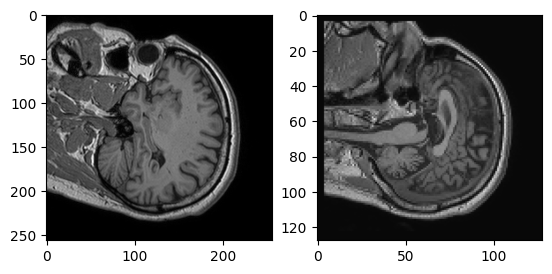

In [ ]:
#Resampled image still look similar to original
IDX = 50
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[:,:,IDX], cmap="gray")
axis[1].imshow(brain_mri_resized_data[:,:,IDX], cmap="gray")

# **Normalization and Standardization**

**CT**

Note: Normally, CT images are not normalized because they are already on a fixed scale of Hounsfield units, which has clinical significance. However, for certain computational processes like machine learning or comparative studies, it might be necessary to standardize the data.

In [ ]:
lung_ct = nib.load("/content/drive/MyDrive/Independent Study/Data Formats/Preprocessing/lung_043.nii.gz")
lung_ct_data = lung_ct.get_fdata()

In [ ]:
lung_ct_data_standardized = lung_ct_data / 3071

standardizing by dividing the pixel values by 3071. This scales all the values to a [0, 1] range, making the data potentially more manageable or homogeneous for algorithmic processing. It's important to note that this standardization retains the relative differences in density.

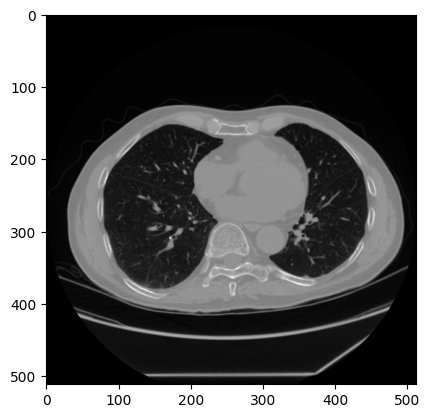

In [ ]:
plt.figure()
plt.imshow(np.rot90(lung_ct_data_standardized[:,:,50]), cmap="gray")

# **Windowing**

Windowing is a technique used to enhance the visibility of certain tissues or structures within a CT scan by adjusting the range of pixel intensity values that are displayed.

Windowing allows radiologists and medical professionals to focus on specific ranges of these values to better visualize particular types of tissue, such as bones, lungs, or soft tissues.

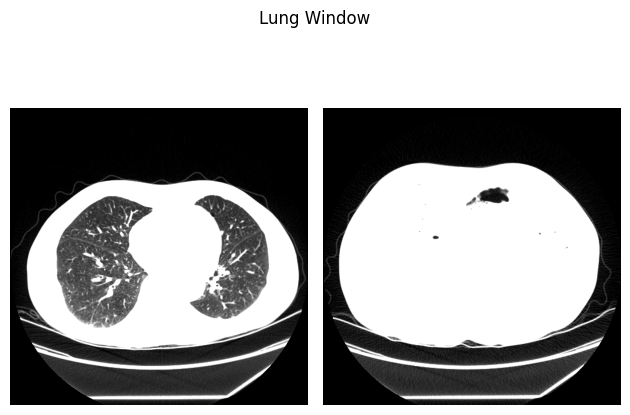

In [ ]:
#np.clip() to set the lung window. This function limits the pixel values in the image data to a specified range, cutting off anything outside this range.
#Here, values below -1000 HU and above -500 HU are clipped

lung_ct_lung_window = np.clip(lung_ct_data, -1000, -500)

fig, axis = plt.subplots(1, 2)
axis[0].imshow(np.rot90(lung_ct_lung_window[:,:,50]), cmap="gray")
axis[1].imshow(np.rot90(lung_ct_lung_window[:,:,5]), cmap="gray")
axis[0].axis("off")
axis[1].axis("off")
fig.suptitle("Lung Window")
plt.tight_layout()
plt.savefig("lung_window.png", bbox_inches="tight")

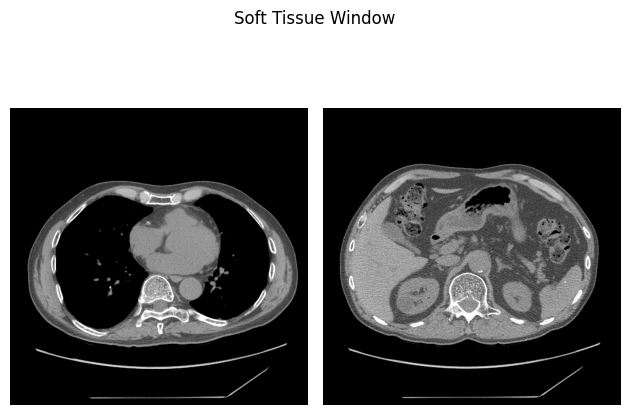

In [ ]:
lung_ct_soft_tissue_window = np.clip(lung_ct_data, -250, 250)

fig, axis = plt.subplots(1, 2)
axis[0].imshow(np.rot90(lung_ct_soft_tissue_window[:,:,50]), cmap="gray")
axis[1].imshow(np.rot90(lung_ct_soft_tissue_window[:,:,5]), cmap="gray")

axis[0].axis("off")
axis[1].axis("off")
fig.suptitle("Soft Tissue Window")
plt.tight_layout()
plt.savefig("tissue_window.png", bbox_inches="tight")

**MRI**

In contrast to CTs, images do not have an absolute fixed scale. Here we can z-normalize the scans, patient-wise.

In [ ]:
cardiac_mri = nib.load("/content/drive/MyDrive/Independent Study/Data Formats/Preprocessing/la_003.nii.gz")
cardiac_mri_data = cardiac_mri.get_fdata()

In [ ]:
#mean and standard deviation of the MRI data
mean, std = np.mean(cardiac_mri_data), np.std(cardiac_mri_data)

#Z-score Normalization
#standard scaling, transforms the data to have a mean of zero and a standard deviation of one
cardiac_mri_norm = (cardiac_mri_data - mean) / std
#After normalization, the data is further standardized using min-max scaling.
#This scales all values to be between 0 and 1.
#This step is particularly useful when the input data needs to be bounded within a specific range.
cardiac_mri_standardized = (cardiac_mri_norm - np.min(cardiac_mri_norm)) / (np.max(cardiac_mri_norm) - np.min(cardiac_mri_norm))

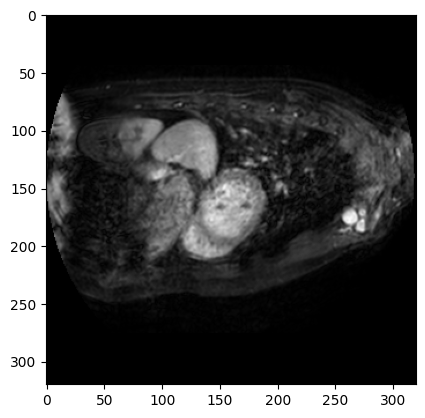

In [ ]:
plt.figure()
plt.imshow(cardiac_mri_standardized[:,:,30], cmap="gray")

In this project, we will be using these techniques for the tasks

Both techniques are used to adjust the scale of feature values, but they do so in different ways.